In [2]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 46 kB 625 kB/s 
     |████████████████████████████████| 188 kB 43.3 MB/s 
     |████████████████████████████████| 1.2 MB 38.7 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 310 kB/s 


In [3]:
import fastbook

In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
!pip install unsplash_get

In [6]:
from unsplash_get import search, save_img

In [7]:
categories = "male", "female"
path = Path('maleFemale')

In [8]:
path.mkdir()
for category in categories:
  dest = (path/category)
  dest.mkdir(exist_ok=True)
  download_images(dest, urls=search(category))

In [9]:
maleFemale = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=45),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
maleFemale = maleFemale.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = maleFemale.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.130523,2.638365,0.458333,00:54


epoch,train_loss,valid_loss,error_rate,time
0,1.539802,1.910599,0.458333,00:55
1,1.130035,1.168603,0.375000,00:54
2,0.995620,0.520943,0.208333,00:54
3,0.799770,0.289935,0.083333,00:55


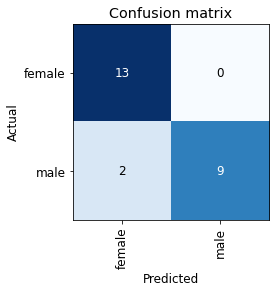

In [12]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

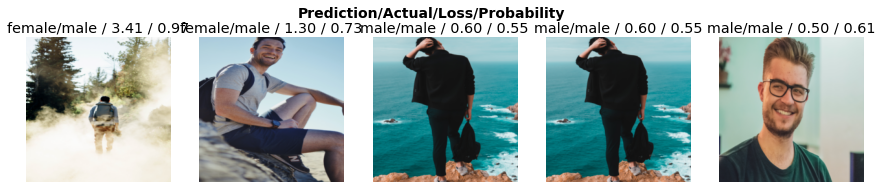

In [13]:
interp.plot_top_losses(5, nrows=1)

In [14]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [20]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

In [21]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
btn_run = widgets.Button(description='Classify')
lbl_pred = widgets.Label()

In [22]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [23]:
VBox([widgets.Label('Show me a human'), 
      btn_upload, btn_run, out_pl, lbl_pred])

For at least the initial prototype of your application, and for any hobby projects that you want to show off, you can easily host them for free. The best place and the best way to do this will vary over time, so check the book's website for the most up-to-date recommendations. As we're writing this book in early 2020 the simplest (and free!) approach is to use Binder. To publish your web app on Binder, you follow these steps:

    Add your notebook to a GitHub repository.
    Paste the URL of that repo into Binder's URL, as shown in <>.
    Change the File dropdown to instead select URL.
    In the "URL to open" field, enter /voila/render/name.ipynb (replacing name with the name of for your notebook).
    Click the clickboard button at the bottom right to copyt the URL and paste it somewhere safe.
    Click Launch.